In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('household_data_1min_residential5.csv')

data.dropna()

,utc_timestamp,cet_cest_timestamp,interpolated,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
458976,2015-10-26T11:35:00Z,2015-10-26T12:35:00+0100,DE_KN_residential4_grid_export | DE_KN_residen...,0.000000,0.010010,0.000000,0.000000
458977,2015-10-26T11:36:00Z,2015-10-26T12:36:00+0100,DE_KN_residential4_grid_export | DE_KN_residen...,0.000000,0.010010,0.000018,0.000000
458978,2015-10-26T11:37:00Z,2015-10-26T12:37:00+0100,DE_KN_residential4_grid_export | DE_KN_residen...,0.000009,0.012451,0.000037,0.000000
458979,2015-10-26T11:38:00Z,2015-10-26T12:38:00+0100,DE_KN_residential4_grid_export | DE_KN_residen...,0.000018,0.014893,0.000055,0.000000
458980,2015-10-26T11:39:00Z,2015-10-26T12:39:00+0100,DE_KN_residential4_grid_export | DE_KN_residen...,0.000027,0.017334,0.000073,0.000000
...,...,...,...,...,...,...,...
1332763,2017-06-24T06:42:00Z,2017-06-24T08:42:00+0200,DE_KN_residential3_dishwasher,393.383753,4506.861369,603.767517,291.382475
1332764,2017-06-24T06:43:00Z,2017-06-24T08:43:00+0200,DE_KN_residential3_dishwasher,393.383753,4506.861369,603.768285,291.383574
1332765,2017-06-24T06:44:00Z,2017-06-24T08:44:00+0200,DE_KN_residential3_dishwasher,393.383753,4506.866252,603.769553,291.384565
1332766,2017-06-24T06:45:00Z,2017-06-24T08:45:00+0200,DE_KN_residential3_dishwasher,393.383753,4506.871134,603.770053,291.385664


In [10]:
rename_columns = {
    'DE_KN_residential5_dishwasher': 'dishwasher',
    'DE_KN_residential5_grid_import': 'grid_import',
    'DE_KN_residential5_refrigerator': 'refrigerator',
    'DE_KN_residential5_washing_machine': 'washing_machine'
}

data = data.rename(columns=rename_columns)

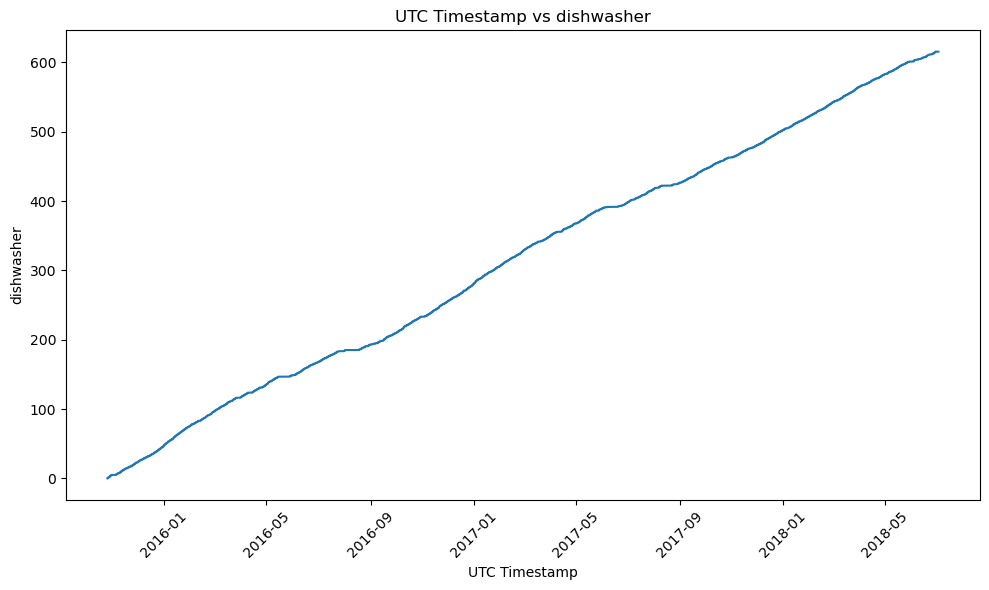

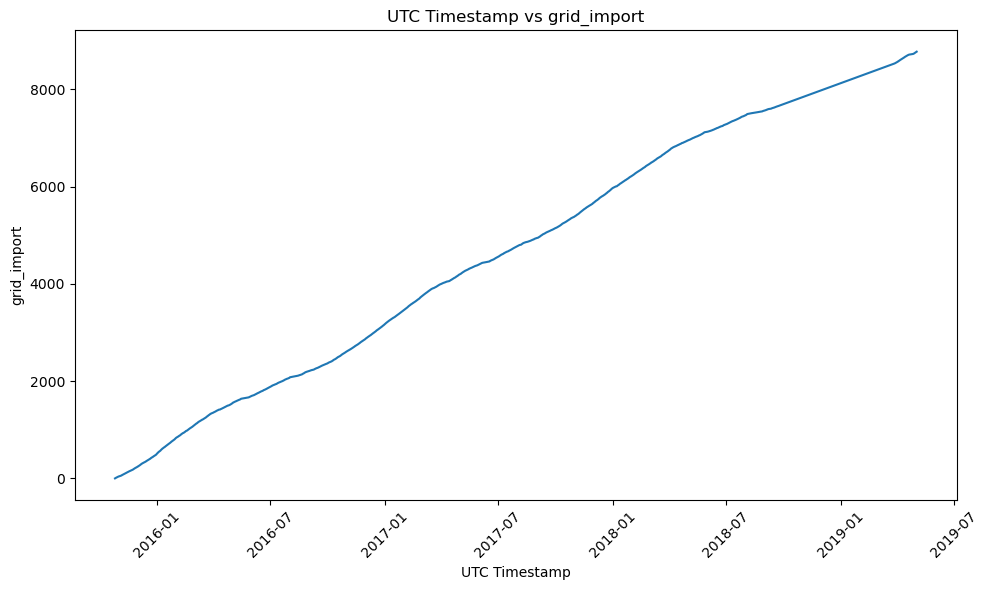

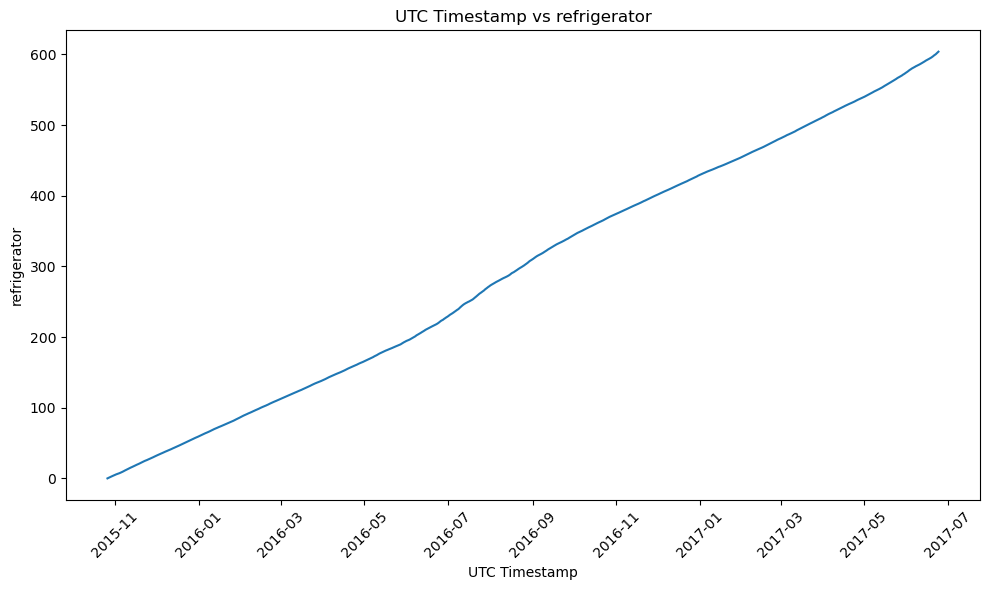

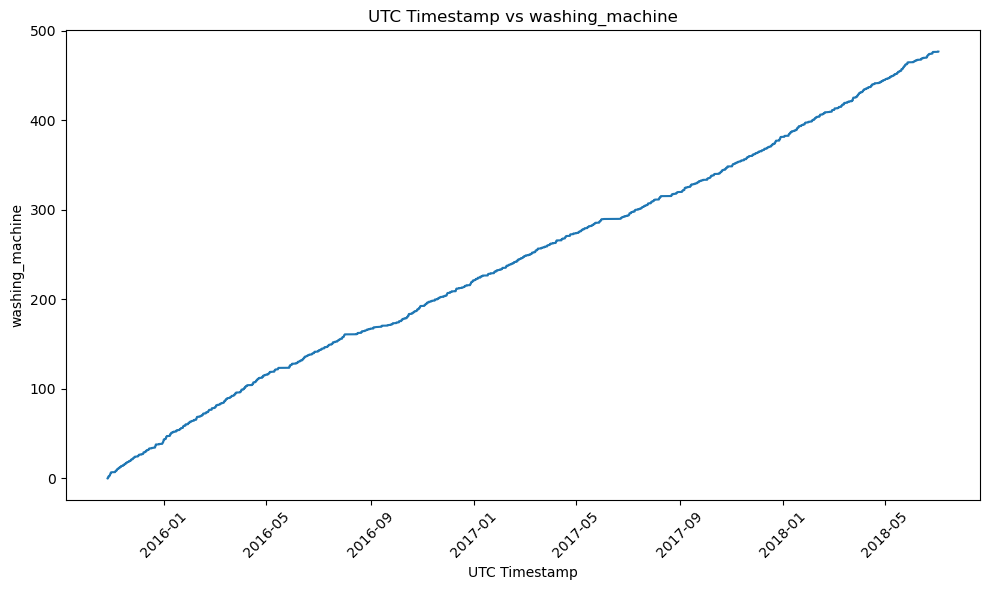

In [11]:
columns_to_plot = [
    'dishwasher',
    'grid_import',
    'refrigerator',
    'washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data['utc_timestamp'], data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
import numpy as np
cumulative_columns = data.select_dtypes(include=[np.number]).columns

non_cumulative_data = data.copy()
for column in cumulative_columns:
    non_cumulative_data[column] = non_cumulative_data[column].diff().fillna(0)

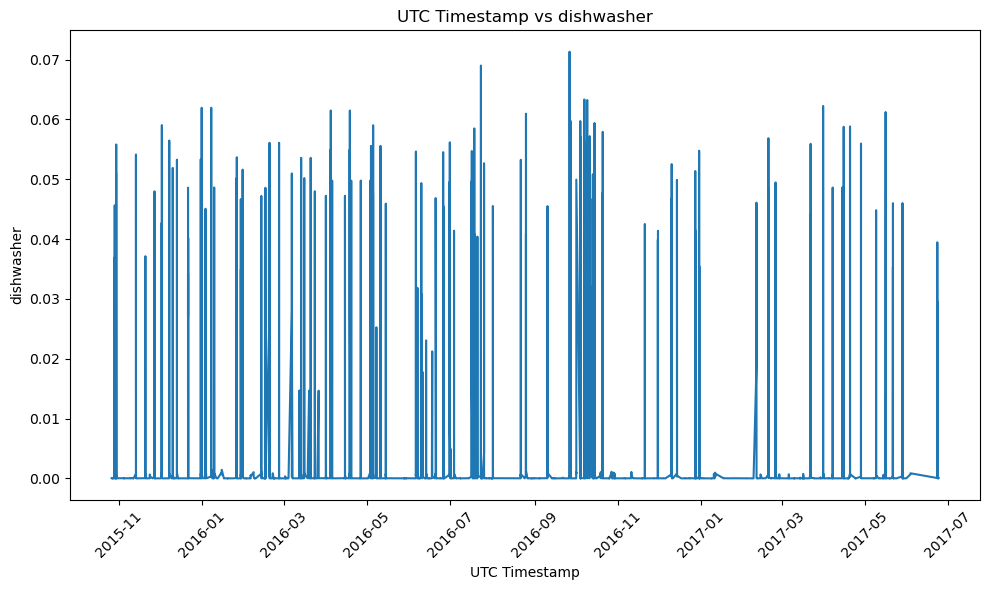

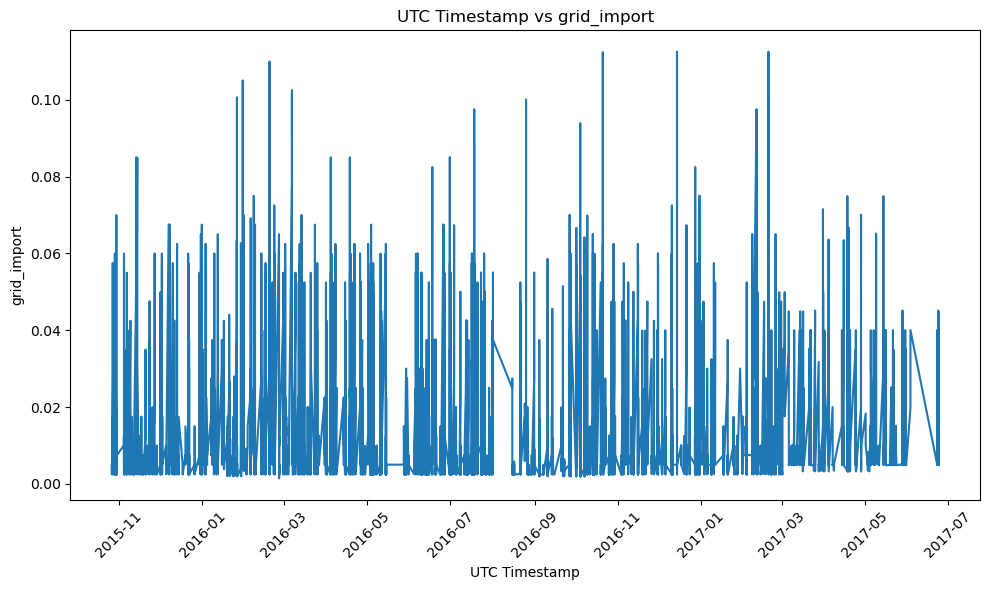

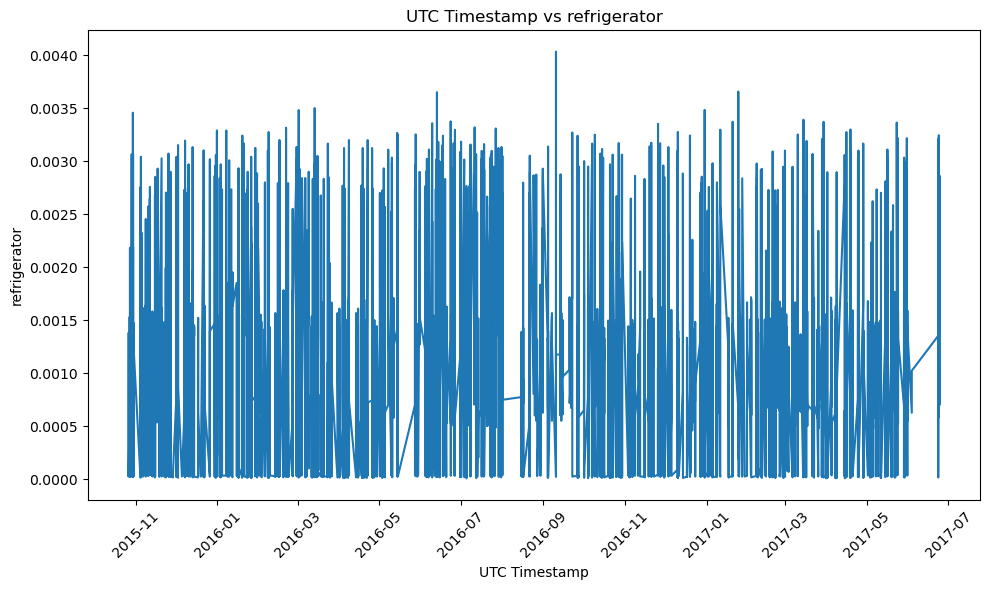

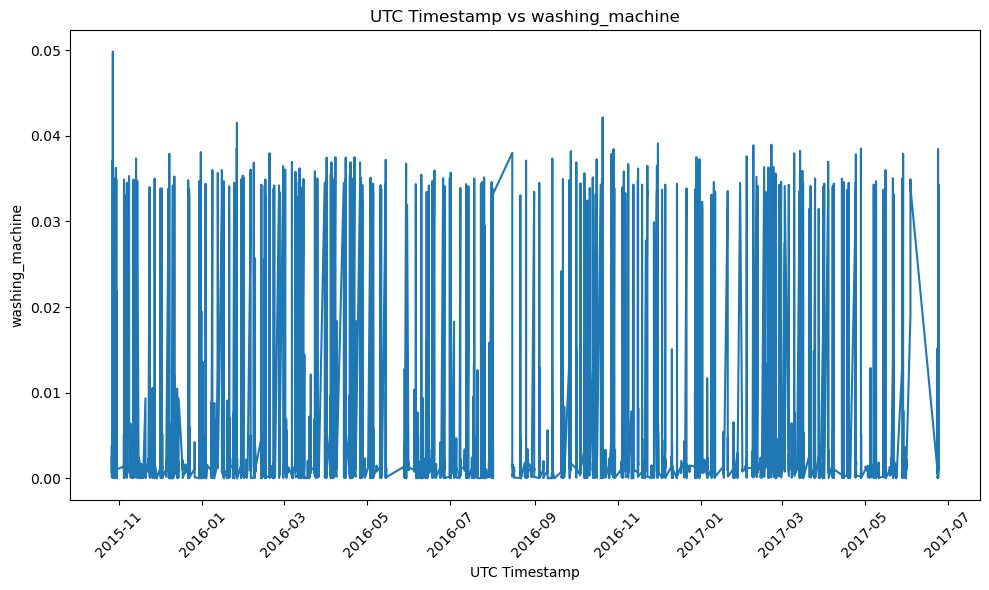

In [13]:
columns_to_plot = [
    'dishwasher',
    'grid_import',
    'refrigerator',
    'washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
non_cumulative_data['utc_timestamp'] = pd.to_datetime(non_cumulative_data['utc_timestamp'])
filtered_data = non_cumulative_data[(non_cumulative_data[columns_to_plot] != 0).all(axis=1)]
#filtered_data =non_cumulative_data

# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['utc_timestamp'],filtered_data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [19]:
filtered_data.drop(columns = ['cet_cest_timestamp'], inplace = True)
filtered_data

C:\Users\kunal\AppData\Local\Temp\ipykernel_36780\2446416117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns = ['cet_cest_timestamp'], inplace = True)


,utc_timestamp,dishwasher,grid_import,refrigerator,washing_machine
459095,2015-10-26 13:34:00+00:00,2.288818e-05,0.005005,0.000031,0.002482
459096,2015-10-26 13:35:00+00:00,2.288818e-05,0.002502,0.000031,0.001282
459097,2015-10-26 13:36:00+00:00,2.288818e-05,0.002502,0.000031,0.001282
459098,2015-10-26 13:37:00+00:00,2.288818e-05,0.005005,0.000031,0.001282
459145,2015-10-26 14:24:00+00:00,8.900960e-06,0.002502,0.000572,0.001617
...,...,...,...,...,...
1332748,2017-06-24 06:27:00+00:00,6.630000e-07,0.004883,0.001202,0.001099
1332749,2017-06-24 06:28:00+00:00,1.017300e-05,0.004883,0.000698,0.002228
1332750,2017-06-24 06:29:00+00:00,1.017200e-05,0.005127,0.000698,0.001038
1332751,2017-06-24 06:30:00+00:00,1.017300e-05,0.005127,0.001532,0.001038


In [25]:
df = filtered_data
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])


df['year'] = df['utc_timestamp'].dt.year
df['month'] = df['utc_timestamp'].dt.month
df['day'] = df['utc_timestamp'].dt.day
df['hour'] = df['utc_timestamp'].dt.hour
df['minute'] = df['utc_timestamp'].dt.minute

df['weekday_weekend'] = df['utc_timestamp'].dt.dayofweek.apply(lambda x: 0 if x < 5 else 1)

df

C:\Users\kunal\AppData\Local\Temp\ipykernel_36780\1342580442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
C:\Users\kunal\AppData\Local\Temp\ipykernel_36780\1342580442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['utc_timestamp'].dt.year
C:\Users\kunal\AppData\Local\Temp\ipykernel_36780\1342580442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,utc_timestamp,dishwasher,grid_import,refrigerator,washing_machine,year,month,day,hour,minute,weekday_weekend
459095,2015-10-26 13:34:00+00:00,2.288818e-05,0.005005,0.000031,0.002482,2015,10,26,13,34,0
459096,2015-10-26 13:35:00+00:00,2.288818e-05,0.002502,0.000031,0.001282,2015,10,26,13,35,0
459097,2015-10-26 13:36:00+00:00,2.288818e-05,0.002502,0.000031,0.001282,2015,10,26,13,36,0
459098,2015-10-26 13:37:00+00:00,2.288818e-05,0.005005,0.000031,0.001282,2015,10,26,13,37,0
459145,2015-10-26 14:24:00+00:00,8.900960e-06,0.002502,0.000572,0.001617,2015,10,26,14,24,0
...,...,...,...,...,...,...,...,...,...,...,...
1332748,2017-06-24 06:27:00+00:00,6.630000e-07,0.004883,0.001202,0.001099,2017,6,24,6,27,1
1332749,2017-06-24 06:28:00+00:00,1.017300e-05,0.004883,0.000698,0.002228,2017,6,24,6,28,1
1332750,2017-06-24 06:29:00+00:00,1.017200e-05,0.005127,0.000698,0.001038,2017,6,24,6,29,1
1332751,2017-06-24 06:30:00+00:00,1.017300e-05,0.005127,0.001532,0.001038,2017,6,24,6,30,1


In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, Conv1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


input_features = df[['year','month','day','hour', 'minute','weekday_weekend', 'grid_import']]
output_targets = df[['dishwasher', 'washing_machine']]


scaler = MinMaxScaler()
input_features = scaler.fit_transform(input_features)
output_scaler = MinMaxScaler()
output_targets = output_scaler.fit_transform(output_targets)

split_index = int(len(input_features) * 0.8)

X_train = input_features[:split_index]
X_test = input_features[split_index:]
y_train = output_targets[:split_index]
y_test = output_targets[split_index:]

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

model = Sequential([
    Conv1D(filters=16, kernel_size=4, input_shape=(7, 1), activation='relu'),
    Bidirectional(LSTM(300, activation='relu', return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(150, activation='relu')),
    Dropout(0.3),
    Dense(2, activation='linear')  
])


model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)


model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

model.summary()
    

Epoch 1/25
357/357 [==============================] - 27s 53ms/step - loss: 0.0156 - val_loss: 0.0162
Epoch 2/25
357/357 [==============================] - 19s 53ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 3/25
357/357 [==============================] - 20s 56ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 4/25
357/357 [==============================] - 20s 56ms/step - loss: 0.0132 - val_loss: 0.0138
Epoch 5/25
357/357 [==============================] - 19s 54ms/step - loss: 0.0133 - val_loss: 0.0140
Epoch 6/25
357/357 [==============================] - 20s 55ms/step - loss: 0.0130 - val_loss: 0.0145
Epoch 7/25
357/357 [==============================] - 21s 58ms/step - loss: 0.0130 - val_loss: 0.0138
Epoch 8/25
357/357 [==============================] - 20s 56ms/step - loss: 0.0128 - val_loss: 0.0141
Epoch 9/25
357/357 [==============================] - 19s 54ms/step - loss: 0.0126 - val_loss: 0.0144
Epoch 10/25
357/357 [==============================] - 20s 55ms/step - loss: 0.012

In [61]:
predictions = model.predict(X_test)

112/112 [==============================] - 2s 17ms/step


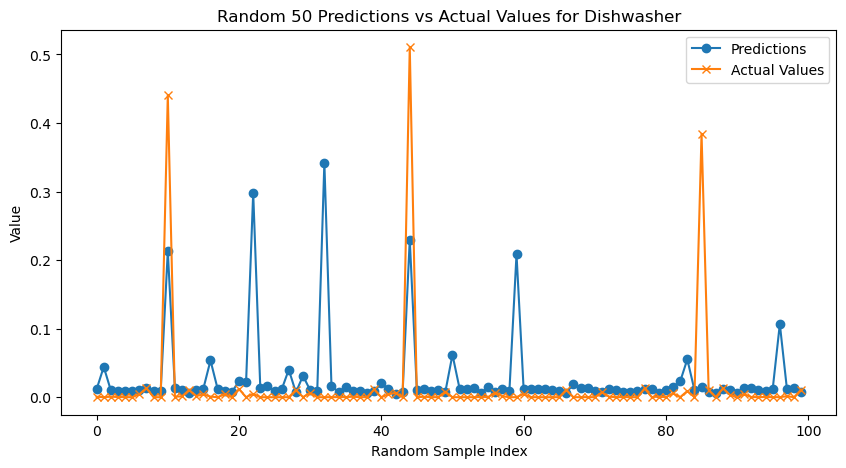

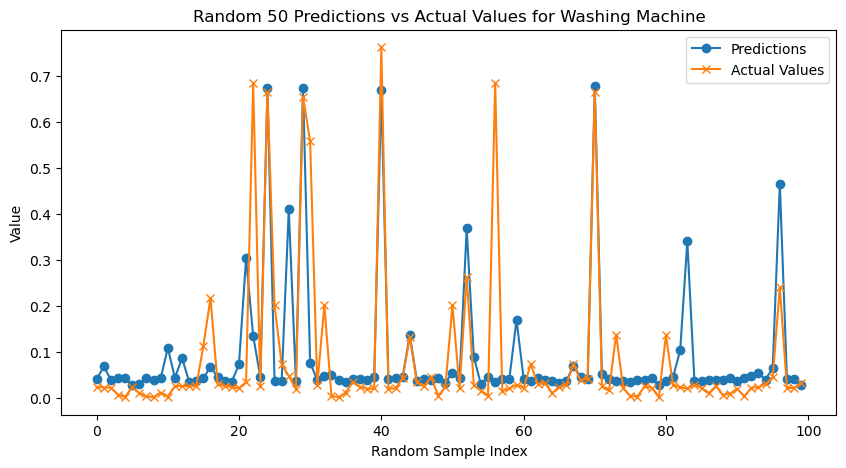

In [66]:

num_samples = predictions.shape[0]
indices = np.random.choice(num_samples, 100, replace=False)

random_predictions = predictions[indices]
random_actual_values = y_test[indices]

features = ['Dishwasher', 'Washing Machine']

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    plt.plot(random_predictions[:, i], label='Predictions', marker='o')
    plt.plot(random_actual_values[:, i], label='Actual Values', marker='x')
    plt.title(f'Random 50 Predictions vs Actual Values for {feature}')
    plt.xlabel('Random Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

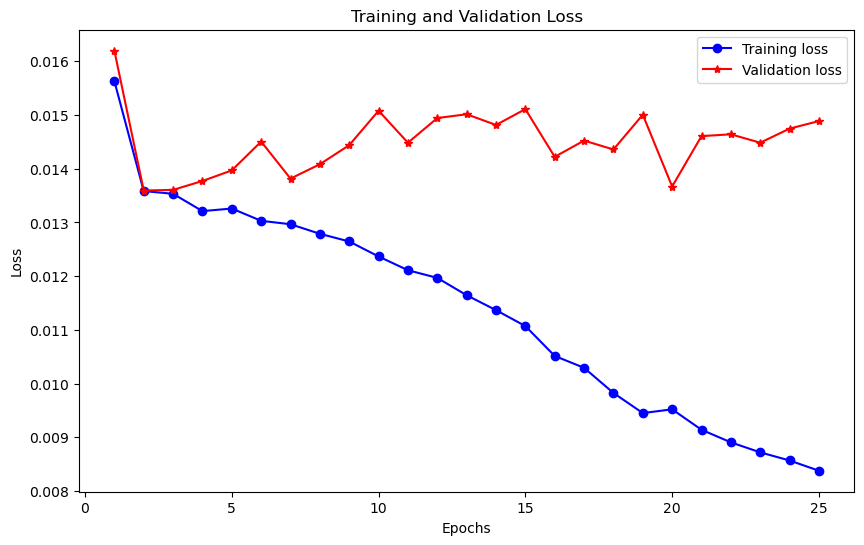

In [63]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method of your model
# It contains the loss values

# Extracting loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Absolute Error (MAE): 0.06102222603485541
Root Mean Squared Error (RMSE): 0.1403044447954102
R-squared: 0.02208000174467123


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

num_outputs = 3
input_features = df[['year','month','day','hour', 'minute','weekday_weekend', 'grid_import']]
output_targets = df[['dishwasher', 'refrigerator', 'washing_machine']]
print("Shape of input features:", input_features.shape)  # Should align with model's input layer
print("Shape of output targets:", output_targets.shape)  

train_size = int(len(input_features) * 0.5)
val_size = int(len(input_features) * 0.15)

X_train, X_temp, y_train, y_temp = train_test_split(input_features, output_targets, train_size=train_size, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.35 / 0.5, random_state=0)  

model = Sequential([
    Dense(80, activation='tanh', input_shape=(7,)),  
    Dense(num_outputs, activation='tanh') 
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Model summary for reference
model.summary()



Shape of input features: (17809, 7)
Shape of output targets: (17809, 3)
Epoch 1/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0016
Epoch 2/100
179/179 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/100
179/179 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 6/100
179/179 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/100
179/179 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/100
179/179 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/100
179/179 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 10/100
179/17

In [59]:
predictions = model.predict(X_test)
predictions.shape

195/195 [==============================] - 0s 2ms/step


(6234, 3)

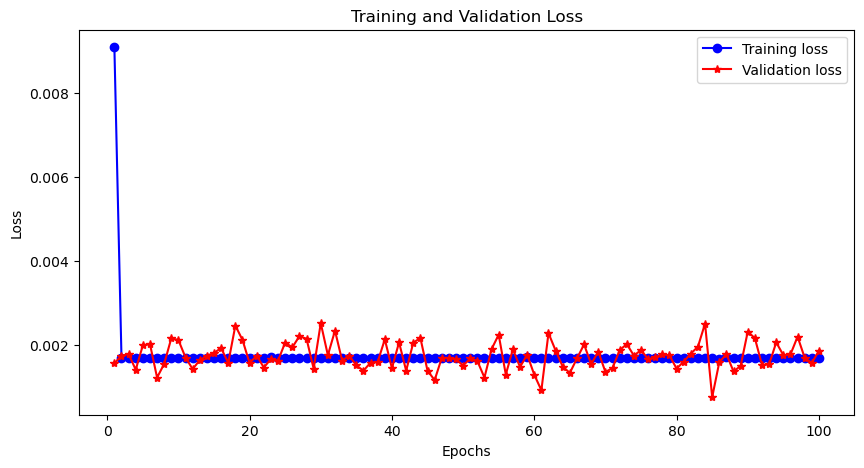

In [57]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object returned by the 'fit' method of your model
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix
import numpy as np


y_test_flat = np.argmax(y_test, axis=1)
predictions_flat = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test_flat, predictions_flat)

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ValueError: Shape of passed values is (6234, 1), indices imply (6234, 3)

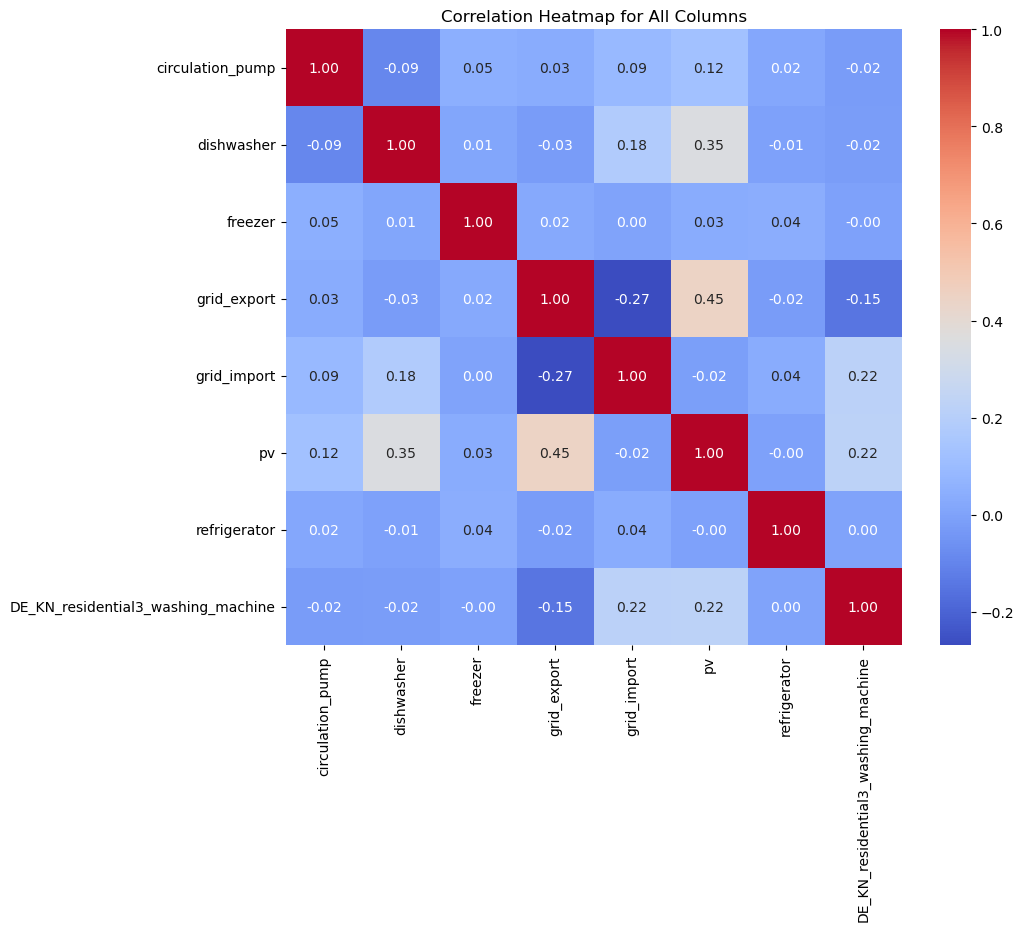

In [17]:
import seaborn as sns

corr_matrix =filtered_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for All Columns')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


'''
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]
'''

filtered_data['utc_timestamp'] = pd.to_datetime(filtered_data['utc_timestamp'])

# Extracting features
filtered_data['hour'] = filtered_data['utc_timestamp'].dt.hour
filtered_data['minute'] = filtered_data['utc_timestamp'].dt.minute
filtered_data['weekday'] = filtered_data['utc_timestamp'].dt.weekday  # Monday=0, Sunday=6
filtered_data['is_weekend'] = filtered_data['weekday'].apply(lambda x: 1 if x >= 5 else 0) 

filtered_data['day'] = filtered_data['utc_timestamp'].dt.day
filtered_data['month'] =filtered_data['utc_timestamp'].dt.month


X = filtered_data[['grid_import', 'grid_export', 'pv', 'hour', 'minute', 'weekday','is_weekend', 'day', 'month']]
y = filtered_data['DE_KN_residential3_washing_machine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

RMSE: 0.010857193766356976
R-squared value: 0.11604779025885403


C:\Users\kunal\AppData\Local\Temp\ipykernel_34832\1525113163.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['utc_timestamp'] = pd.to_datetime(filtered_data['utc_timestamp'])
C:\Users\kunal\AppData\Local\Temp\ipykernel_34832\1525113163.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['utc_timestamp'].dt.hour
C:\Users\kunal\AppData\Local\Temp\ipykernel_34832\1525113163.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

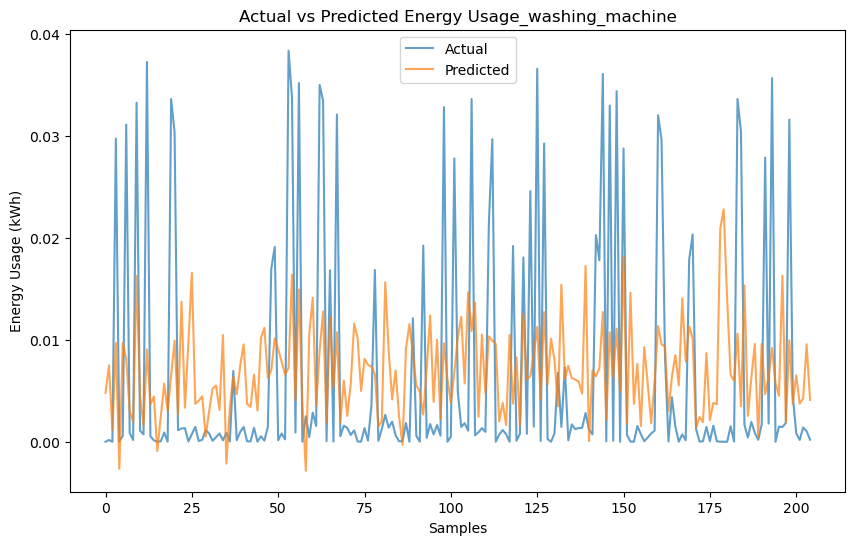

In [19]:
actual = y_test  
predicted = y_pred 
plt.figure(figsize=(10, 6))
plt.plot(actual.values, label='Actual', alpha=0.7)
plt.plot(predicted, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Energy Usage_washing_machine')
plt.xlabel('Samples')
plt.ylabel('Energy Usage (kWh)')
plt.legend()
plt.show()